In [2]:
#librerias
import numpy as np
from scipy.linalg import lu_factor, lu_solve, hilbert, qr, norm
import matplotlib.pyplot as plt
from scipy import integrate

In [3]:
# Parte A: Calcular el número de condición de la matriz de Hilbert
ns = [2, 3, 5, 10, 15, 20, 25]
condition_numbers = []

for n in ns:
    H = hilbert(n)
    condition_number = np.linalg.cond(H)
    condition_numbers.append(condition_number)

print("Número de condición de la matriz de Hilbert:")
for n, cn in zip(ns, condition_numbers):
    print(f"n = {n}: {cn}")

Número de condición de la matriz de Hilbert:
n = 2: 19.28147006790397
n = 3: 524.0567775860644
n = 5: 476607.2502422687
n = 10: 16024413500363.82
n = 15: 3.67568286586649e+17
n = 20: 1.3193976166344822e+18
n = 25: 1.3309197553221074e+18


A medida que n (el tamaño de la matriz) aumenta, el número de condición aumenta drásticamente. Esto es una característica común de las matrices de Hilbert y refleja su mal condiciónamiento a medida que el sistema se vuelve más grande y es un resultado esperado. Esto nos indica que pueden haber problemas al hacer ya aproximación ya que los números de condición tan grandes pueden generar problemas graves al resolver sistemas de ecuaciones usando métodos directos, como la descomposición LU

In [4]:
## definimos la función teorica
def f(x, k_max=17):
    return np.sum([np.sin(k * np.pi * x) for k in range(1, k_max + 1)], axis=0)

In [56]:
#condiciones iniciales del problema
n = 20
A = hilbert(n)
x_vals = np.linspace(0, 1, 100)  # valores de x
b = np.array([integrate.quad(lambda x: f(x) * x**i, 0, 1)[0] for i in range(n)])

In [57]:
# Parte b) Aproximación utilizando el método LU
LU, piv = lu_factor(A)
c = lu_solve((LU, piv), b)

In [58]:
c

array([ 1.06371107e+00,  3.73632750e+02,  4.78651913e+03, -3.34437726e+05,
        4.86793173e+06, -3.50373899e+07,  1.46408944e+08, -3.68915176e+08,
        5.27624765e+08, -2.79730429e+08, -3.09589814e+08,  5.38804623e+08,
       -8.81456165e+07, -3.78814351e+08,  3.84516082e+08, -2.77219410e+08,
        2.77306996e+08, -2.08044021e+08,  7.61053102e+07, -9.80916479e+06])

In [59]:
aproximacion1 = np.dot(np.array([x_vals**i for i in range(n)]).T, c)

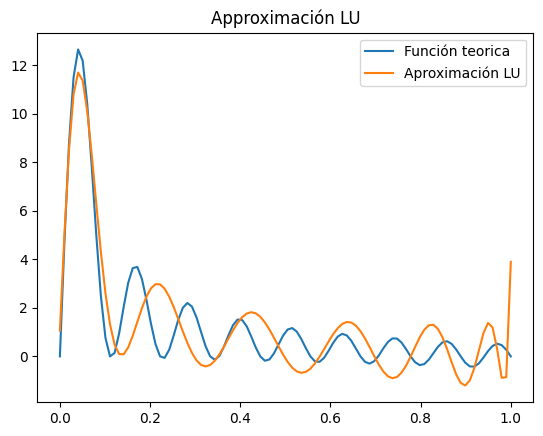

In [60]:
plt.plot(x_vals, f(x_vals), label="Función teorica")
plt.plot(x_vals, aproximacion1, label="Aproximación LU")
plt.legend()
plt.title("Approximación LU")
plt.show()

In [61]:
#Parte c: aproximación QR
Q, R = qr(A)
c = np.linalg.solve(R, np.dot(Q.T, b))

In [62]:
c

array([-4.22057112e+00,  1.29144388e+03, -3.46843773e+04,  3.99294805e+05,
       -2.44350901e+06,  8.29345464e+06, -1.35757994e+07, -1.73506986e+06,
        4.84123284e+07, -7.91911575e+07,  4.13181096e+07,  7.07384322e+06,
       -6.43810229e+06,  5.74485581e+07, -1.76399199e+08,  1.48408863e+08,
        5.11928191e+07, -1.59274567e+08,  9.66572395e+07, -2.01137098e+07])

In [63]:
aproximacion2 = np.dot(np.array([x_vals**i for i in range(n)]).T, c)

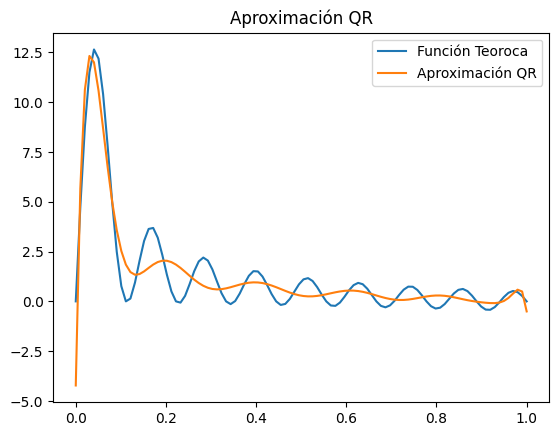

In [64]:
plt.plot(x_vals, f(x_vals), label="Función Teoroca")
plt.plot(x_vals, aproximacion2, label="Aproximación QR")
plt.legend()
plt.title("Aproximación QR")
plt.show()

In [65]:
##comparación de ambos metodos
error_lu = norm(f(x_vals) - aproximacion1)
print(f"Error con LU: {error_lu}")

error_qr = norm(f(x_vals) - aproximacion2)
print(f"Error con QR: {error_qr}")

Error con LU: 12.415309356587654
Error con QR: 9.059250713254881


Podemos concluir que el método QR parece ser mejor que el método LU en este caso, ya que tiene un error mucho más bajo, de igual forma en las graficas se observa que la aproximación de QR se ajusta mejor a la función final, esto debido a que el metodo LU puede ser propensa a problemas de pivoteo y errores de redondeo, especialmente si la matriz es mal condicionada como lo estaba en este caso. El método QR, en cambio, es menos susceptible a estos problemas y tiende a producir resultados más precisos en situaciones difíciles.